In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [89]:
xtrain = pd.read_pickle('X_train.pickle')
ytrain = pd.read_pickle('y_train.pickle')

In [90]:
d = {'text' : xtrain , 'label' : ytrain}
train = pd.DataFrame(data = d)

In [91]:
train.label.value_counts()

0    9209
1    4200
Name: label, dtype: int64

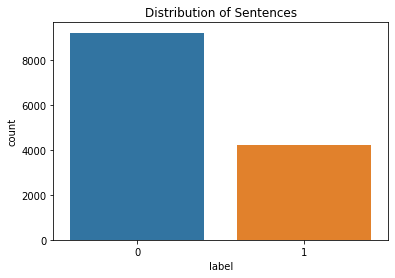

In [92]:
sns.countplot(x='label',data=train)
plt.title('Distribution of Sentences')
plt.show()

In [93]:
train['length'] = train.text.apply(lambda x: len(x))

In [94]:
train.length.describe()

count    13409.000000
mean        77.334477
std         37.807809
min          8.000000
25%         56.000000
50%         69.000000
75%         91.000000
max        822.000000
Name: length, dtype: float64

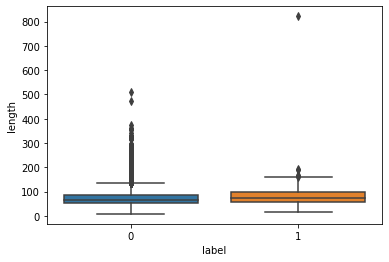

In [95]:
sns.boxplot(x='label',y='length',data=train)

In [96]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

**List of Contractions in English Language: https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions**

In [97]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    #print(contractions_pattern)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        #print(expanded_contraction)
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    #print(expanded_text)
   # print(expanded_contraction)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [98]:
train.text[1000]

"So I'm at Golden Gate bridge and everyone is telling me to jump, I'm only out for a jog!"

In [99]:
expand_contractions(train.text[1000])

'So I am at Golden Gate bridge and everyone is telling me to jump, I am only out for a jog!'

In [83]:
def clear_punctuations(text):
    text = re.findall(r"[\w']+|[.,!?;]", text)
    text = ' '.join(text)
    return text

In [100]:
clear_punctuations(train.text[1000])

"So I'm at Golden Gate bridge and everyone is telling me to jump , I'm only out for a jog !"

In [101]:
train.text = train.text.apply(lambda x : expand_contractions(x))
train.text = train.text.apply(lambda x : clear_punctuations(x))

In [102]:
train.head()

,text,label,length
0,"My grandfather died recently , He spent his fi...",1,122
1,I was sat in traffic the other day . Got hit b...,1,53
2,Whats the difference between a ginger fanny an...,1,135
3,"Money cannot buy happiness , but I would much ...",1,64
4,2B or not 2B . That is the pencil .,1,33
